In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
stv = pd.read_csv('C:\\Eric\\Projects\\Kaggle-M5\Dataset\\sales_train_validation.csv')
cal = pd.read_csv('C:\\Eric\\Projects\\Kaggle-M5\Dataset\\calendar.csv')
sellp = pd.read_csv('C:\\Eric\\Projects\\Kaggle-M5\Dataset\\sell_prices.csv')

In [4]:
stv.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


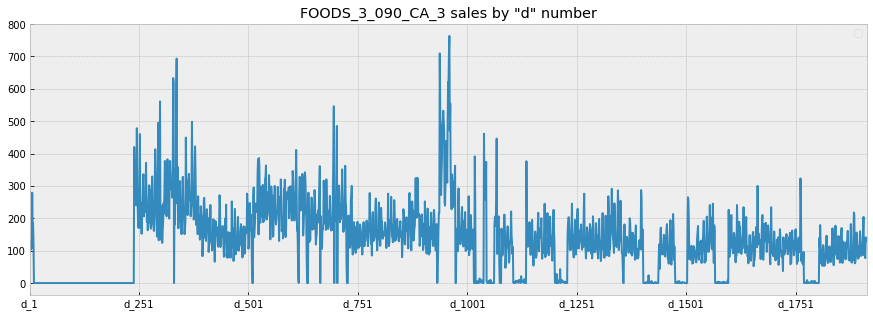

In [5]:
d_cols = [c for c in stv.columns if 'd_' in c] # sales data columns

# Below we are chaining the following steps in pandas:
# 1. Select the item.
# 2. Set the id as the index, Keep only sales data columns
# 3. Transform so it's a column
# 4. Plot the data
stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(15, 5),
          title='FOODS_3_090_CA_3 sales by "d" number',
          color=next(color_cycle))
plt.legend('')
plt.show()

In [6]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
# Calendar data looks like this (only showing columns we care about for now)
cal[['d','date','event_name_1','event_name_2',
     'event_type_1','event_type_2', 'snap_CA']].head()

,d,date,event_name_1,event_name_2,event_type_1,event_type_2,snap_CA
0,d_1,2011-01-29,NaN,NaN,NaN,NaN,0
1,d_2,2011-01-30,NaN,NaN,NaN,NaN,0
2,d_3,2011-01-31,NaN,NaN,NaN,NaN,0
3,d_4,2011-02-01,NaN,NaN,NaN,NaN,1
4,d_5,2011-02-02,NaN,NaN,NaN,NaN,1


In [8]:
#merge calendar on our items' data 
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T

In [9]:
example.head()

,8412
d_1,108
d_2,132
d_3,102
d_4,120
d_5,106


In [10]:
example = example.rename(columns = {8412:'FOODS_3_090_CA_3'}) # Name it correctly 

In [11]:
example.head()

,FOODS_3_090_CA_3
d_1,108
d_2,132
d_3,102
d_4,120
d_5,106


In [12]:
example = example.reset_index().rename(columns={'index':'d'})

In [13]:
example.head()

,d,FOODS_3_090_CA_3
0,d_1,108
1,d_2,132
2,d_3,102
3,d_4,120
4,d_5,106


In [14]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [15]:
example = example.merge(cal, how='left', validate = '1:1')

In [16]:
example.head()

,d,FOODS_3_090_CA_3,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,108,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,132,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,102,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,120,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,106,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


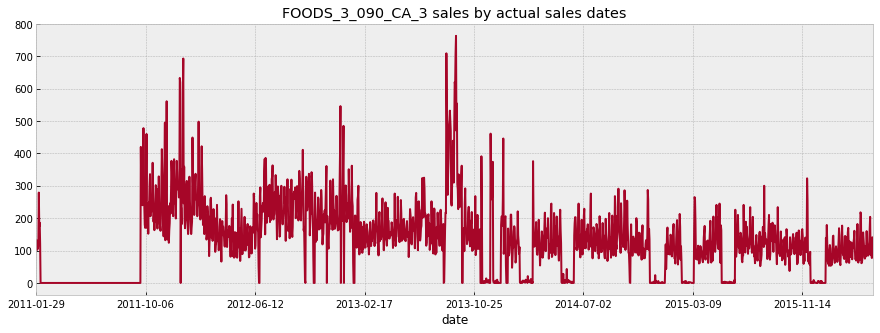

In [17]:
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15,5),
         color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sales dates')
plt.show()

In [19]:
# Select more top selling examples 
example2 = stv.loc[stv['id'] == 'HOBBIES_1_234_CA_3_validation'][d_cols].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'}) # Name it correctly
example2 = example2.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example2 = example2.merge(cal, how='left', validate='1:1')

In [20]:
example3 = stv.loc[stv['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][d_cols].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) # Name it correctly
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(cal, how='left', validate='1:1')

In [ ]:
examples = ['FOOD']

In [43]:
example_df = [example, example2, example3]

In [46]:
exampe

,d,HOUSEHOLD_1_118_CA_3,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,17,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,27,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,28,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,32,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,24,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
5,d_6,23,2011-02-03,11101,Thursday,6,2,2011,NaN,NaN,NaN,NaN,1,1,1
6,d_7,25,2011-02-04,11101,Friday,7,2,2011,NaN,NaN,NaN,NaN,1,0,0
7,d_8,12,2011-02-05,11102,Saturday,1,2,2011,NaN,NaN,NaN,NaN,1,1,1
8,d_9,23,2011-02-06,11102,Sunday,2,2,2011,SuperBowl,Sporting,NaN,NaN,1,1,1
9,d_10,36,2011-02-07,11102,Monday,3,2,2011,NaN,NaN,NaN,NaN,1,1,0


In [48]:
example3.groupby('wday').mean()['HOUSEHOLD_1_118_CA_3']

wday
1    23.686131
2    27.412409
3    24.619048
4    22.139194
5    21.102564
6    19.472527
7    20.175824
Name: HOUSEHOLD_1_118_CA_3, dtype: float64

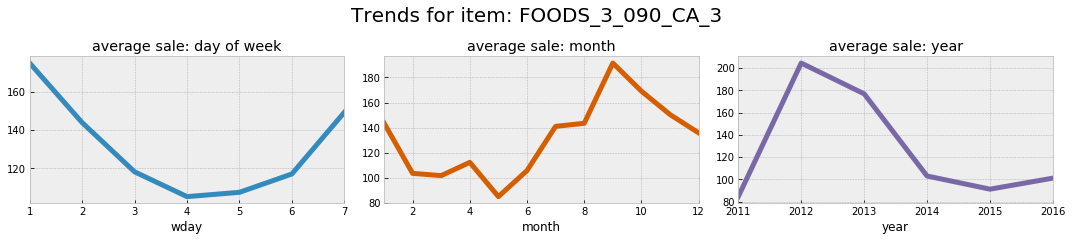

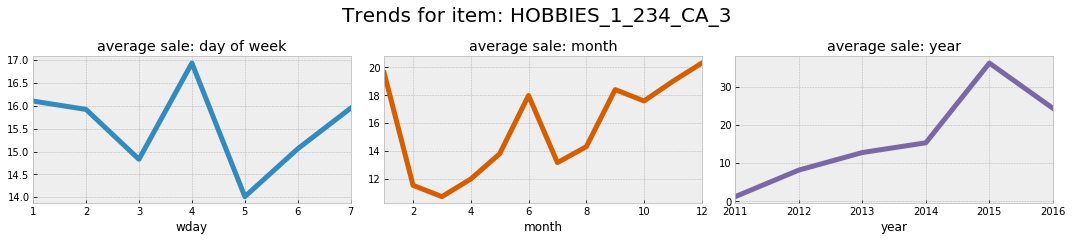

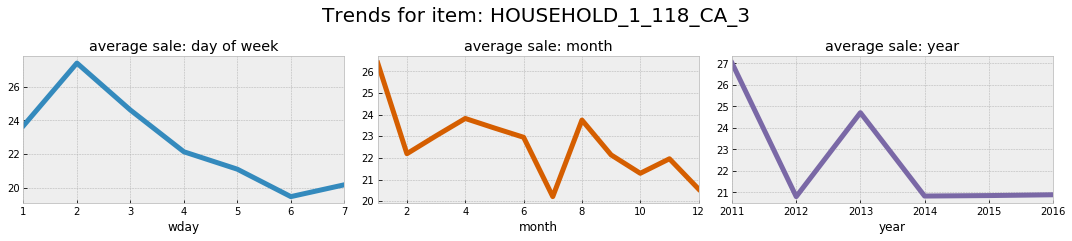

In [49]:
examples = ['FOODS_3_090_CA_3','HOBBIES_1_234_CA_3','HOUSEHOLD_1_118_CA_3']
example_df = [example, example2, example3]
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
    example_df[i].groupby('wday').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: day of week',
              lw=5,
              color=color_pal[0],
              ax=ax1)
    example_df[i].groupby('month').mean()[examples[i]] \
        .plot(kind='line',
              title='average sale: month',
              lw=5,
              color=color_pal[4],

              ax=ax2)
    example_df[i].groupby('year').mean()[examples[i]] \
        .plot(kind='line',
              lw=5,
              title='average sale: year',
              color=color_pal[2],

              ax=ax3)
    fig.suptitle(f'Trends for item: {examples[i]}',
                 size=20,
                 y=1.1)
    plt.tight_layout()
    plt.show()

In [55]:
twenty_examples = stv.sample(20, random_state=529) \
        .set_index('id')[d_cols] \
        .T \
        .merge(cal.set_index('d')['date'],
               left_index=True,
               right_index=True,
                validate='1:1') \
        .set_index('date')

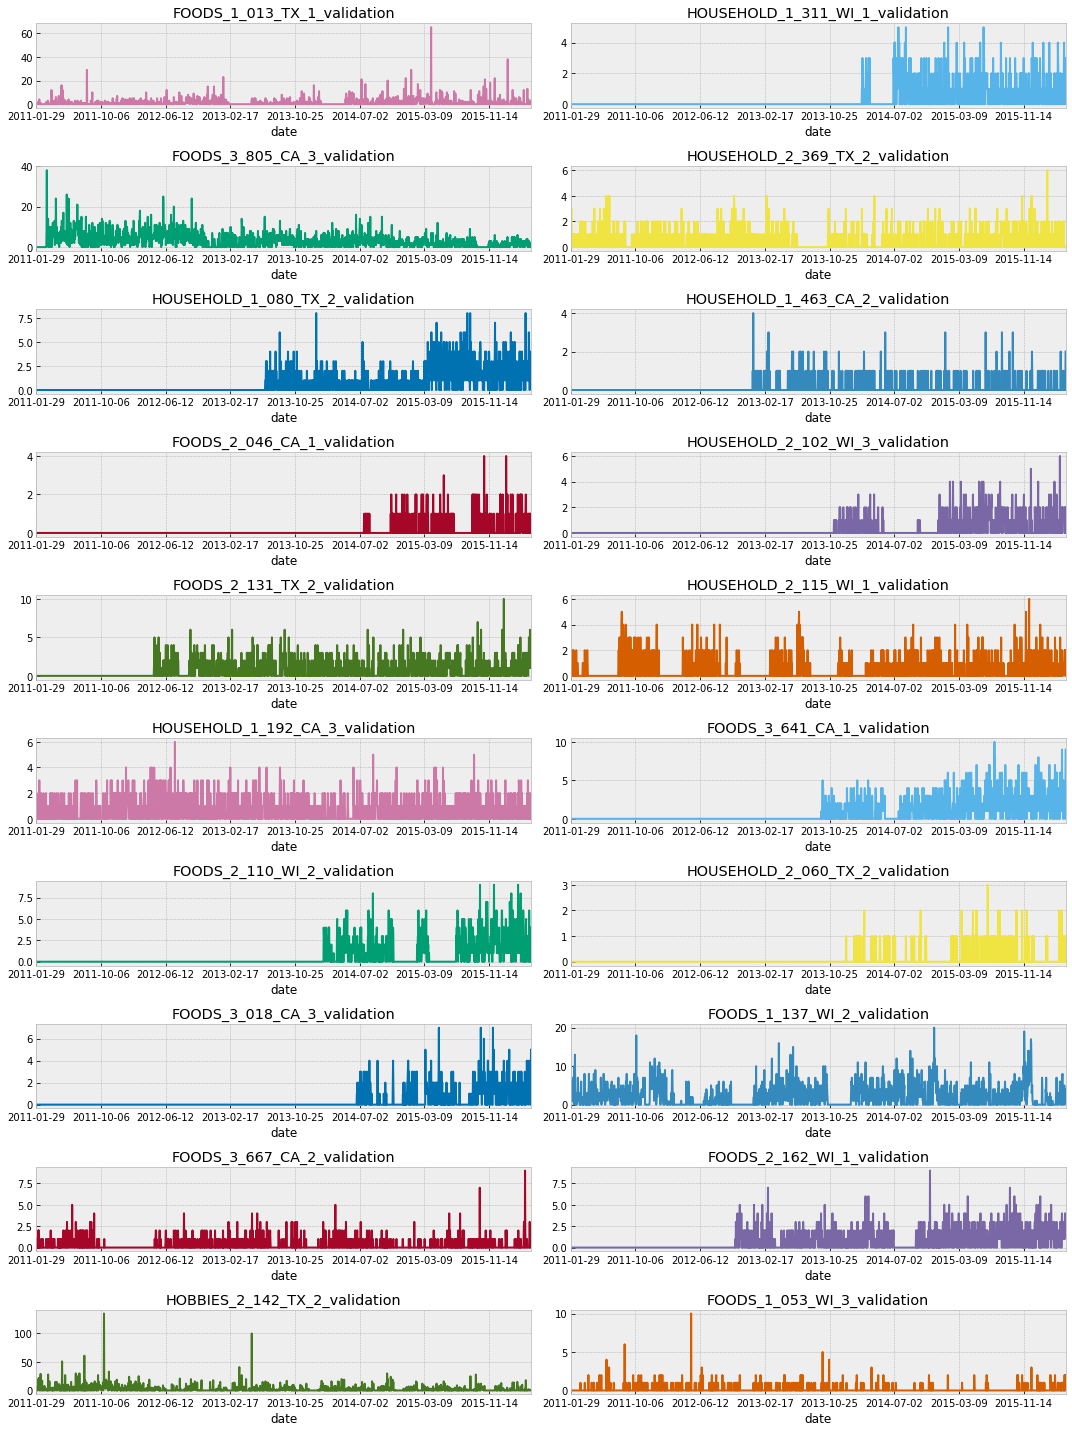

In [60]:
fig, axs = plt.subplots(10,2, figsize= (15,20))
axs = axs.flatten()

ax_idx = 0 

for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1 
plt.tight_layout()
plt.show()



In [63]:
#Combined Sales over Time by Type

In [64]:
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

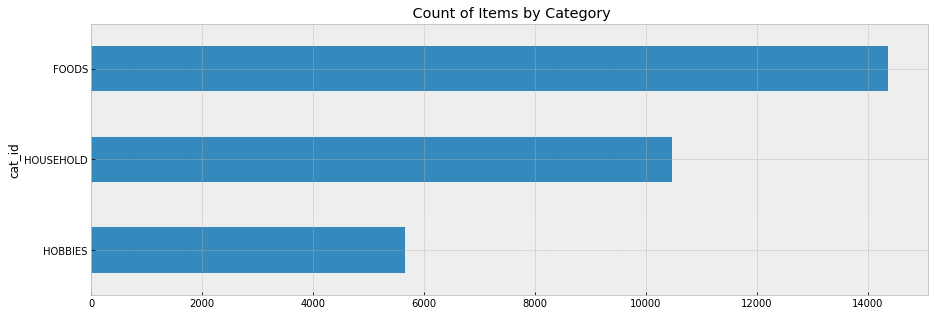

In [65]:
stv.groupby('cat_id').count()['id'] \
    .sort_values()  \
    .plot(kind='barh', figsize=(15,5), title = ' Count of Items by Category')
plt.show()

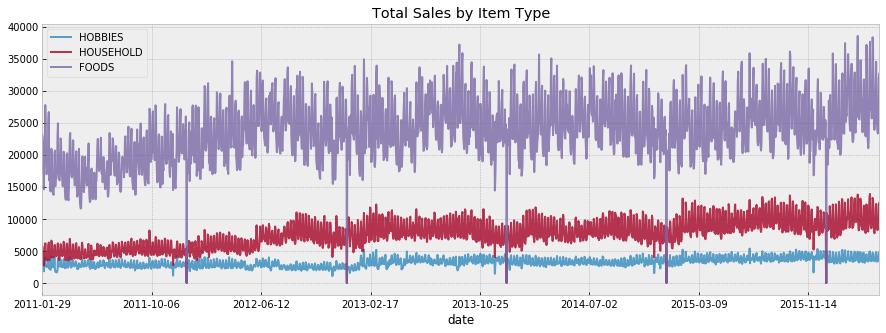

In [67]:
past_sales = stv.set_index('id')[d_cols]  \
    .T  \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1')  \
    .set_index('date')


for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15,5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.show()

In [68]:
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

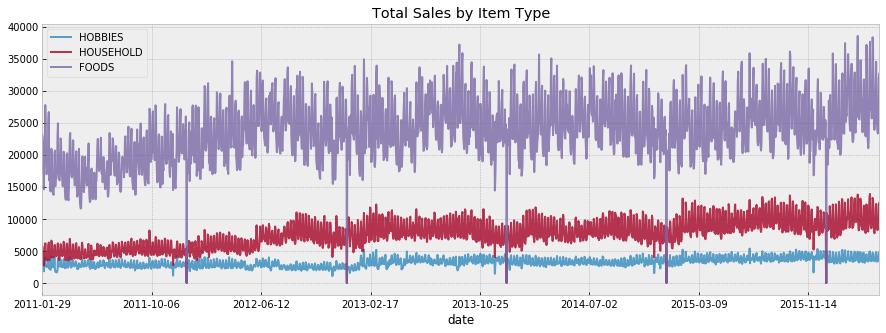

In [75]:
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.show()

In [ ]:
examples = ['FOODS_3_090_CA_3']

In [21]:
#fig, (ax1, ax2, ax3)
fig  = plt.figure()



<Figure size 432x288 with 0 Axes>

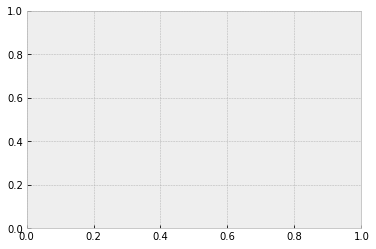

In [24]:
fig, ax= plt.subplots()

ValueError: not enough values to unpack (expected 5, got 2)

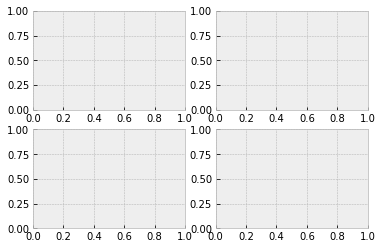

In [25]:
fig, ax1, ax2, ax3, ax4 = plt.subplots(nrows=2, ncols=2)

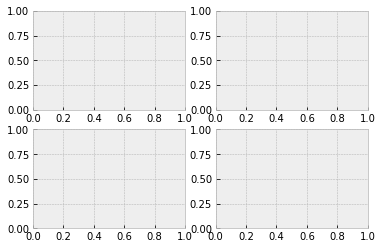

In [27]:
fig, [[ax1,ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)

In [28]:
type(fig)

matplotlib.figure.Figure

In [29]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

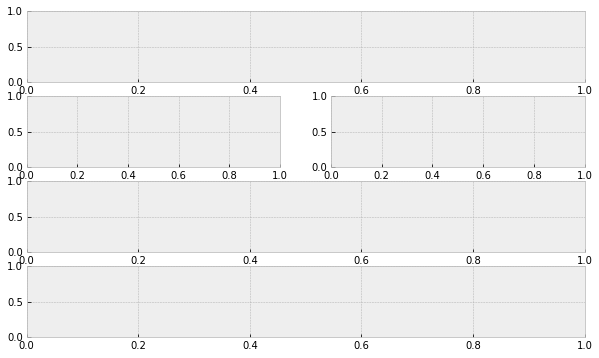

In [33]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

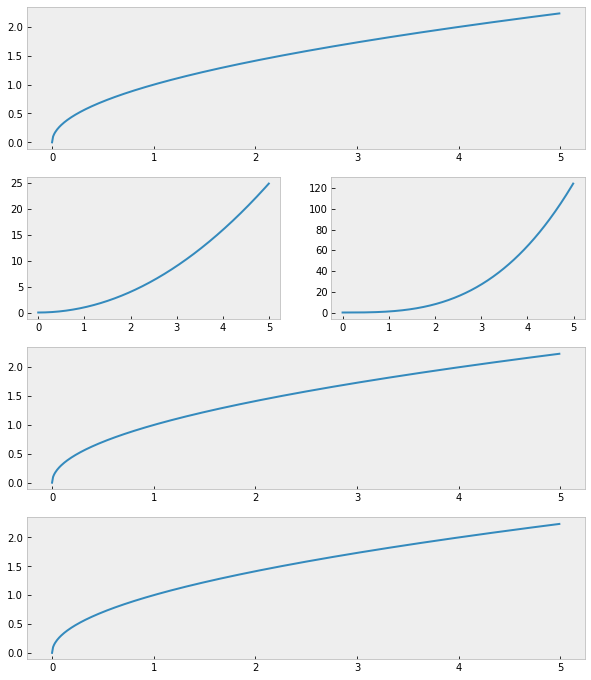

In [34]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.show()




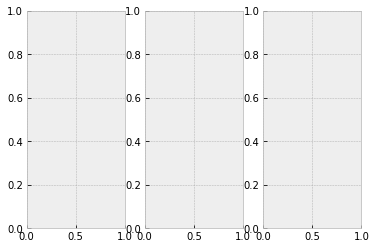

In [35]:
fig, ax = plt.subplots(1,3)
plt.show()

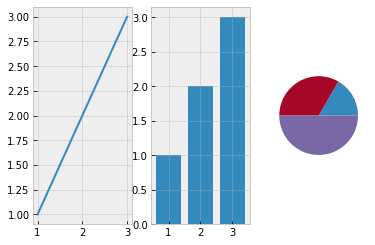

In [37]:
#1행 3열 액자들을 그린다~

fig, ax = plt.subplots(1,3)

ax[0].plot([1,2,3],[1,2,3], )

ax[1].bar([1,2,3],[1,2,3])

ax[2].pie([1,2,3])

plt.show()


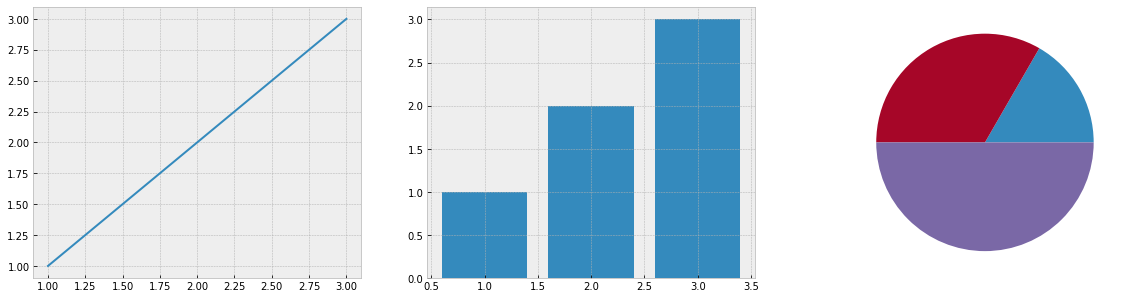

In [39]:
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].plot([1,2,3],[1,2,3], ) 
ax[1].bar([1,2,3],[1,2,3]) 
ax[2].pie([1,2,3]) 

plt.show()



Text(0.5, 0, '')

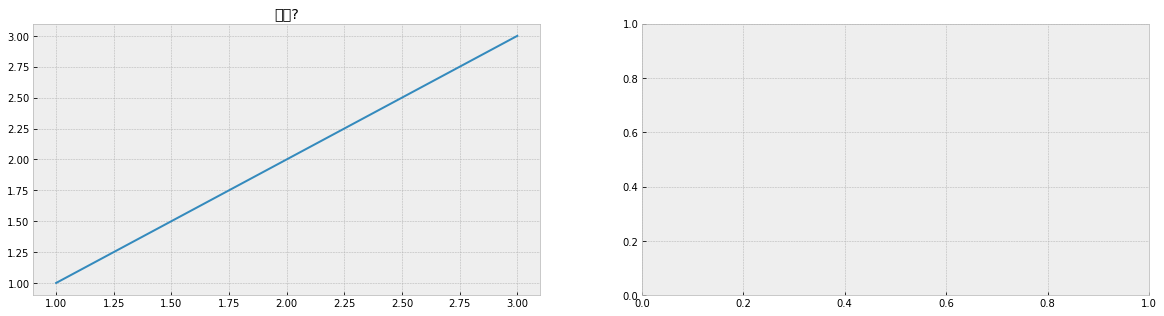

In [42]:
figx, ax = plt.subplots(1,2, figsize= (20,5))

# 0 번 그래프

ax[0].plot( [1,2,3], [1,2,3], color= 'C0')
ax[0].set_title("의응?")
ax[0].set_xlabel("")